In [1]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

In [3]:
print('Train: x=%s, y=%s \nTest: x=%s, y=%s' % (x_train.shape, y_train.shape, x_test.shape,y_test.shape))

Train: x=(50000, 32, 32, 3), y=(50000, 1) 
Test: x=(10000, 32, 32, 3), y=(10000, 1)


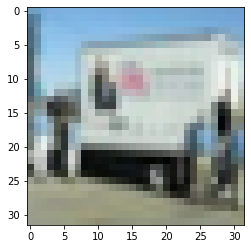

In [4]:
plt.imshow(x_train[76])

In [26]:
y_train[76]

array([9], dtype=uint8)

In [27]:
x_train.shape

(50000, 32, 32, 3)

In [28]:
x_train[76]

array([[[118, 157, 187],
        [110, 162, 196],
        [118, 172, 219],
        ...,
        [114, 161, 207],
        [114, 161, 207],
        [113, 161, 207]],

       [[ 84, 120, 147],
        [ 88, 136, 168],
        [120, 173, 218],
        ...,
        [113, 165, 217],
        [114, 164, 216],
        [115, 163, 212]],

       [[ 85, 117, 142],
        [ 99, 141, 171],
        [131, 183, 225],
        ...,
        [120, 168, 216],
        [120, 168, 215],
        [119, 167, 213]],

       ...,

       [[155, 158, 142],
        [152, 156, 136],
        [151, 155, 133],
        ...,
        [105, 106,  87],
        [ 82,  84,  63],
        [127, 129, 105]],

       [[154, 155, 138],
        [155, 157, 137],
        [156, 158, 136],
        ...,
        [150, 152, 130],
        [142, 145, 120],
        [139, 142, 113]],

       [[153, 155, 143],
        [152, 155, 139],
        [154, 156, 139],
        ...,
        [145, 147, 128],
        [148, 150, 127],
        [146, 149, 119]]

In [5]:
from tensorflow.keras.utils import to_categorical

In [6]:
to_categorical(y_train)[75]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [7]:
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

In [8]:
#Normalizing= make it easies for the neuron to process the data 
#x-min(x)/(max-min)
#x-0/(255-0)
#x/255
x_train=x_train/255
x_test=x_test/255

# CNN Model Training

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

In [23]:
#Convolutional Layer
model=Sequential()
model.add(Conv2D(filters=64,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))

#Pooling Layer
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#Flatten Image From 32 by 32 to 1024 before final layer
model.add(Flatten())

#128 Neurons in Dense Hidden Layer(you can change this number of neurons)
model.add(Dense(128,activation='relu'))

#Last Layer in the Classifir, thus 10 possible classes
model.add(Dense(10,activation='softmax'))

#Compile the model
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])  #we can add in additionial merics

In [24]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 29, 29, 64)        3136      
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 26, 26, 32)        32800     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 10, 10, 64)        32832     
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 7, 7, 32)          32800     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 288)              

In [25]:
model.fit(x_train,y_train,epochs=20,validation_data=(x_test,y_test))


Epoch 1/20
1563/1563 [==============================] - 363s 233ms/step - loss: 1.5992 - accuracy: 0.4143 - val_loss: 1.3317 - val_accuracy: 0.5196
Epoch 2/20
1563/1563 [==============================] - 354s 226ms/step - loss: 1.2441 - accuracy: 0.5538 - val_loss: 1.2064 - val_accuracy: 0.5670
Epoch 3/20
1563/1563 [==============================] - 353s 226ms/step - loss: 1.0787 - accuracy: 0.6156 - val_loss: 1.0826 - val_accuracy: 0.6182
Epoch 4/20
1563/1563 [==============================] - 349s 223ms/step - loss: 0.9723 - accuracy: 0.6580 - val_loss: 1.0224 - val_accuracy: 0.6464
Epoch 5/20
1563/1563 [==============================] - 353s 226ms/step - loss: 0.8971 - accuracy: 0.6841 - val_loss: 0.9458 - val_accuracy: 0.6744
Epoch 6/20
1563/1563 [==============================] - 346s 221ms/step - loss: 0.8358 - accuracy: 0.7049 - val_loss: 0.9528 - val_accuracy: 0.6715
Epoch 7/20
1563/1563 [==============================] - 344s 220ms/step - loss: 0.7843 - accuracy: 0.7222 - val_

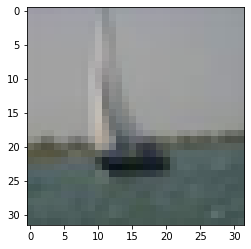

In [26]:
plt.imshow(x_test[55].reshape(32,32,3))

In [27]:
np.argmax(y_test[55]) #argmax give max value position

8

In [32]:
y_pred=model.predict(x_test[55][None,:])

In [33]:
y_pred

array([[4.0842374e-03, 5.9891213e-04, 1.9411545e-04, 4.8368668e-07,
        8.6604337e-07, 1.5507944e-09, 1.4570893e-09, 1.0462528e-08,
        9.9504906e-01, 7.2222610e-05]], dtype=float32)

In [29]:
def show_imgs(x):
    plt.figure(1,figsize=(10,10))
    k=0
    for i in range(0,4):
        for j in range(0,4):
            plt.subplot2grid((4,4),(i,j))
            plt.title('Actual:'+str(np.argmax(y_test[k]))+'Predict:'+ str(np.argmax(model.predict(x_test[k][None,:]))))
            plt.imshow(np.squeeze(x[k]),cmap='gray')
            k=k+1
    plt.tight_layout()

Actual: [3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9, 8]
Predicted: [5, 1, 9, 0, 6, 6, 1, 2, 3, 1, 2, 9, 4, 7, 9, 0]


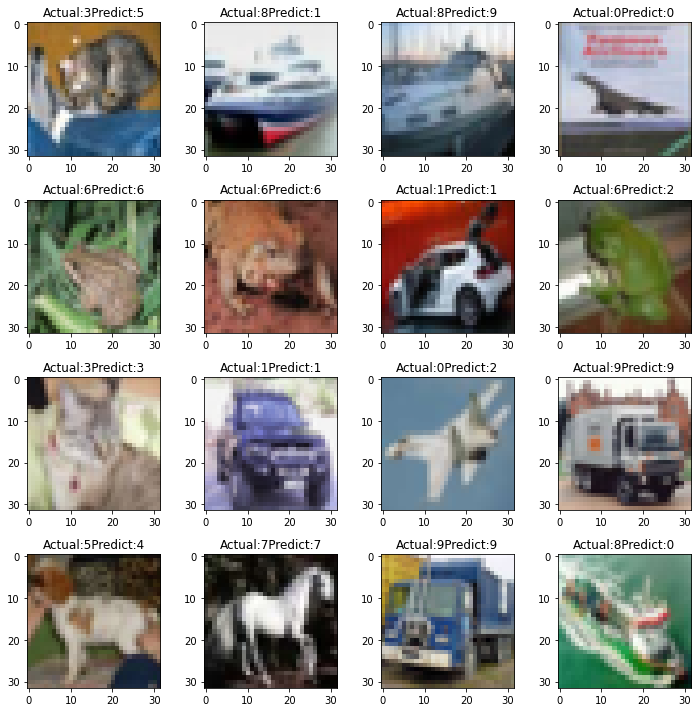

In [37]:
show_imgs(x_test[:16])
print('Actual:'  ,[x for x in np.argmax(y_test[:16],1)])
print('Predicted:'  ,[x for x in np.argmax(model.predict(x_test[:16]),1)])